A step by step of using gradient boosting (XGBoost, LightGBM, and CatBoost) on Titanic dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [4]:
# 1. Load data from GitHub
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(titanic_url)

In [5]:
# 2. Basic preprocessing
def preprocess_data(df):
    # Select features
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    target = 'Survived'

    df = df[features + [target]].copy()

    # Handle missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Encode categorical variables
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Embarked'] = le.fit_transform(df['Embarked'])

    return df

data = preprocess_data(data)


<ipython-input-5-4f3816ebdd04>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-4f3816ebdd04>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [6]:
# 3. Split data
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 4. XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:, 1]

print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, xgb_prob):.4f}")


XGBoost Results:
Accuracy: 0.8212
ROC AUC: 0.8840


In [8]:
# 5. LightGBM
lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
lgbm_prob = lgbm.predict_proba(X_test)[:, 1]

print("\nLightGBM Results:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, lgbm_prob):.4f}")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [9]:
# 6. CatBoost
cat = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    random_state=42,
    verbose=0
)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
cat_prob = cat.predict_proba(X_test)[:, 1]

print("\nCatBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, cat_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, cat_prob):.4f}")



CatBoost Results:
Accuracy: 0.8045
ROC AUC: 0.8873


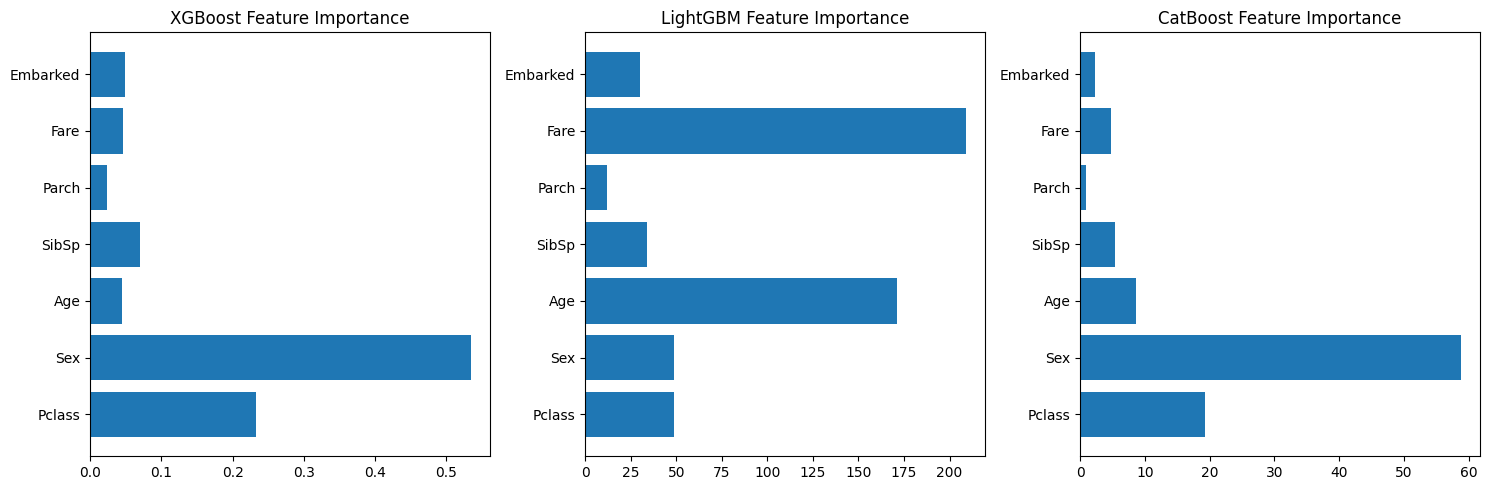

In [10]:
# 7. Feature Importance Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.barh(X.columns, xgb.feature_importances_)
plt.title('XGBoost Feature Importance')

plt.subplot(1, 3, 2)
plt.barh(X.columns, lgbm.feature_importances_)
plt.title('LightGBM Feature Importance')

plt.subplot(1, 3, 3)
plt.barh(X.columns, cat.feature_importances_)
plt.title('CatBoost Feature Importance')

plt.tight_layout()
plt.show()